In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
# Import modules
import numpy as np # maths

from time import time# timer for debug

    # gather results obtained from the runs
import pickle # open .pkl files where python objects have been saved
from safe import safe # the empty class which is used to save the results
    
    # system commands
import os
    
    # interact with the C++ core and the Python core
import dimers as dim # C++ interface module
import KagomeFunctions as kf # "library" allowing to work on Kagome
import KagomeDrawing as kdraw # "library" allowing to plot Kagome
import Observables as obs #observables that can be used by the run script
import KagomeFT as kft #small functions to compute the FT
import AnalysisFunctions as af # functions to make the analysis code cleaner
    #plots using matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams.update({'font.size': 14, 'pgf.texsystem':'pdflatex'})

In [3]:
# Create a folder to save the pictures
p = 1
foldername = '../../Analysis_PSI_EPFL/Runs_10-07-20_BothRef/'
results_foldername = 'KJ1_refField_L4_ri4_rj4_folder/Results_10-07-20/'.format(p)
filenamelist = ['KJ1_refField_L4_ri4_rj4_folder/backup'.format(p)]
os.makedirs('./' + foldername + results_foldername, exist_ok = True)

n = len(filenamelist)

In [4]:
[L, numsites, J1, J2, J3, J3st, J4, nb, num_in_bin, temperatures, nt,
 stat_temps, temperatures_plots, hfields, nh, 
 stat_hfields, hfields_plots, listfunctions, sref, ids2walker] = \
af.LoadParameters(foldername, filenamelist)

In [5]:
s_ijl, ijl_s = kdraw.createspinsitetable(L[0])
print("nb ", nb, "num_in_bin ", num_in_bin)
swapst_th, swapsh_th, swapst, swapsh = af.LoadSwaps(foldername, filenamelist, nb, num_in_bin, nh, nt)



nb  [256] num_in_bin  [4]


In [7]:

kw = {'binning': False, 'plzplot': True, 'plotmin': 0, 'plotmax': 16}

In [ ]:

[t_h_MeanE, t_h_MeanEsq, t_h_varMeanE, t_h_varMeanEsq, C, ErrC] = \
 af.LoadEnergy(foldername, filenamelist, numsites,
               nb, stat_temps, temperatures, stat_hfields, listfunctions, **kw)



In [8]:

[t_h_MeanM, t_h_MeanMsq, t_h_varMeanM, t_h_varMeanMsq, Chi, ErrChi] = \
 af.LoadMagnetisation(foldername, filenamelist, numsites,
               nb, stat_temps, temperatures, stat_hfields, listfunctions, **kw)

OSError: Unable to open file (unable to open file: name = './../../Analysis_PSI_EPFL/Runs_10-07-20_BothRef/KJ1_refField_L4_ri4_rj4_folder/backup_Magnetisation_final.hkl', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

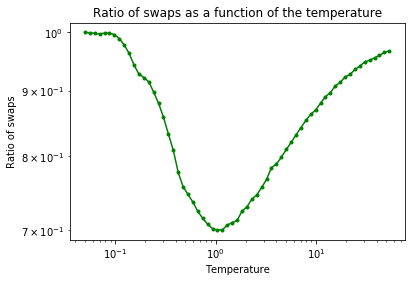

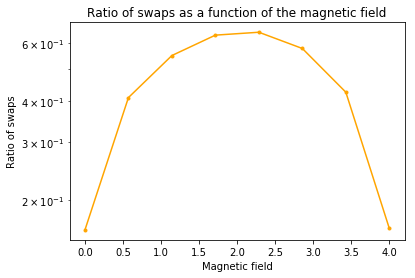

In [9]:
###########################################
        ## ALGORITHM ANALYSIS ##
###########################################
tidmin = 0
tidmax = nt
af.SwapsAnalysis(L, n, tidmin, tidmax, temperatures, hfields,
                 foldername, results_foldername, swapst, swapsh)

In [ ]:
###########################################
        ## Energy ANALYSIS ##
###########################################
tidmin = 0
tidmax = [len(stat_temps[i]) for i in range(n)]
temperatures_plots = np.array(temperatures_plots)
### Energy
S0 = np.log(2)
kw = {'gscheck': True}
af.BasicPlotsE(L, n, tidmin, tidmax, temperatures_plots, hfields_plots, foldername,
                results_foldername, filenamelist, t_h_MeanE, t_h_MeanEsq, t_h_varMeanE,
                t_h_varMeanEsq, C, ErrC, J1, J2, J3, J4, **kw)
plt.show()

In [ ]:
###########################################
        ## MAGNETISATION ANALYSIS ##
###########################################
af.BasicPlotsM(L, n, tidmin, tidmax, temperatures_plots, hfields_plots, foldername,
                results_foldername, filenamelist, t_h_MeanM, t_h_MeanMsq, t_h_varMeanM,
                t_h_varMeanMsq, C, ErrC, J1, J2, J3, J4, **kw)
plt.show()

In [10]:
rmmag = True
kw = {'rmmag':rmmag}

In [11]:
t_h_MeanFc, t_h_varMeanFc, t_h_MeanSi, t_h_varMeanSi= \
 af.LoadFirstCorrelations(foldername, filenamelist, listfunctions,stat_temps[0:4], stat_hfields, nb, **kw)

OSError: Unable to open file (unable to open file: name = './../../Analysis_PSI_EPFL/Runs_10-07-20_BothRef/KJ1_refField_L4_ri4_rj4_folder/backup_Si_final.hkl', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
tmin = 20
plt.figure(figsize=(10,10), dpi = 200)
plt.semilogx(temperatures_plots[0][tmin:],t_h_MeanFc[0][tmin:,0,0],'.',label = 'NN')
plt.semilogx(temperatures_plots[0][tmin:],t_h_MeanFc[0][tmin:,0,1],'.',label = 'NN2')
plt.semilogx(temperatures_plots[0][tmin:],t_h_MeanFc[0][tmin:,0,2],'.',label = 'NN3par')
plt.semilogx(temperatures_plots[0][tmin:],t_h_MeanFc[0][tmin:,0,3],'.',label = 'NN3star')
plt.title(r"$h_{tip}/J=$"+"{0}".format(p))
plt.xlabel("T")
plt.ylabel("Correlation") 
plt.legend()
plt.savefig("./" + foldername + results_foldername + "/FirstCorrelations.png")

In [ ]:
t_h_MeanSs, t_h_varMeanSs, t_h_MeanSi, t_h_varMeanSi, t_h_MeanCorr, t_h_errCorrEstim = \
 af.LoadCentralCorrelations(foldername, filenamelist, listfunctions, sref, stat_temps[0:4], stat_hfields, nb, **kw)


In [ ]:
### COMPUTING CORRELATIONS FROM <SISJ> AND <SI> and plotting in 2D
ploth = False
if not ploth:
    tid = 0
    hid = 0
    rid = tid
else:
    tid = 0
    hid = 0
    rid = hid

[corr, errcorr, maxerr] = af.PrepPlot2DCorrelations(rid, n, 
                                                t_h_MeanCorr,
                                                t_h_errCorrEstim,
                                                t_h_MeanSi,
                                                hfields_plots,
                                                temperatures_plots,\
                                                ploth = ploth)
print("t = ",temperatures_plots[0][tid])
print("h = ",hfields_plots[0][hid])

In [ ]:
af.PlotFirstCorrelations(n, L,foldername, results_foldername,  hfields_plots, temperatures_plots,
                         t_h_MeanCorr, t_h_errCorrEstim, sref, \
                         distmax = 2, ploth = ploth, plotFirst = True,
                        t_h_MeanFc = t_h_MeanFc)